In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

In [587]:
data = pd.read_excel('/content/Training data.xlsx')
data

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
995,yes,M,2,1,1,9,18,108,64.12
996,no,M,1,2,2,2,19,109,75.47
997,yes,M,2,2,1,5,17,123,76.73
998,yes,F,1,3,3,8,17,104,69.07


In [588]:
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

In [589]:
data['internet'] = data['internet'].apply(lambda x: 1 if x == 'yes' else 0)
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [591]:
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
             internet  sex  traveltime  studytime  freetime  absences  \
internet         NaN  NaN         NaN        NaN       NaN       NaN   
sex              NaN  NaN         NaN        NaN       NaN       NaN   
traveltime       NaN  NaN    1.000000  -0.027322  0.012513 -0.009708   
studytime        NaN  NaN   -0.027322   1.000000 -0.004684  0.000855   
freetime         NaN  NaN    0.012513  -0.004684  1.000000 -0.025704   
absences         NaN  NaN   -0.009708   0.000855 -0.025704  1.000000   
age              NaN  NaN    0.034390  -0.013454  0.036142 -0.048074   
iq               NaN  NaN   -0.001843   0.036174  0.001900  0.003842   
marks            NaN  NaN   -0.144812   0.523067 -0.173897 -0.200877   

                 age        iq     marks  
internet         NaN       NaN       NaN  
sex              NaN       NaN       NaN  
traveltime  0.034390 -0.001843 -0.144812  
studytime  -0.013454  0.036174  0.523067  
freetime    0.036142  0.001900 -0.173897  


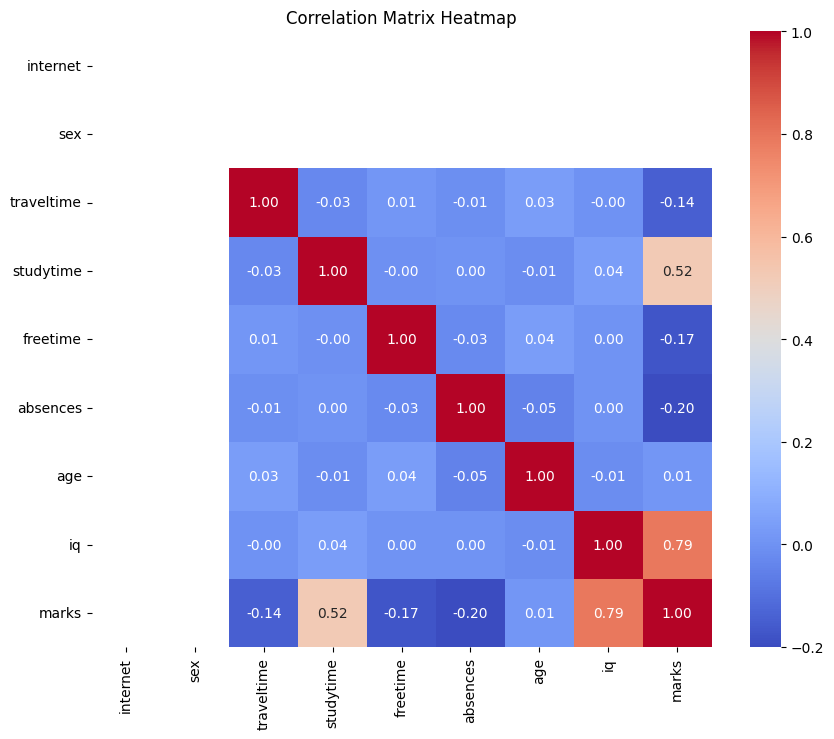

In [592]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

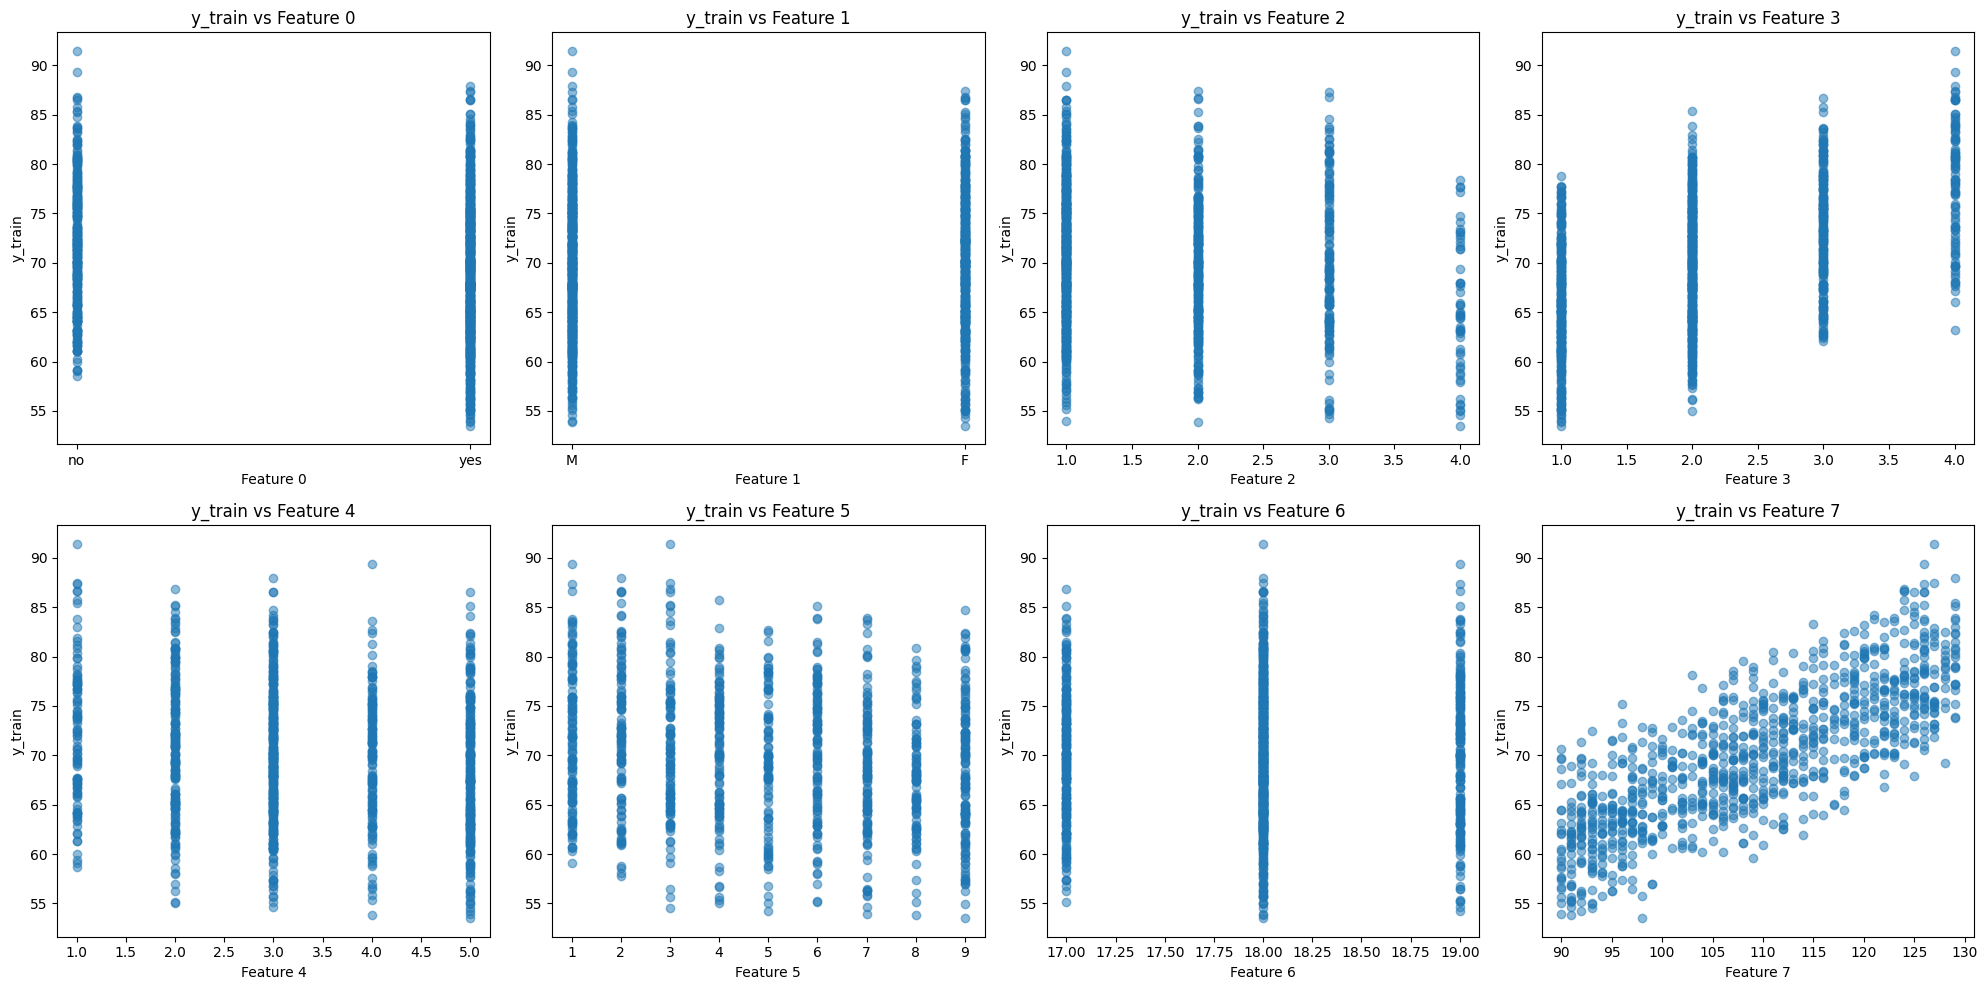

In [593]:
# Determine the number of features
num_features = x_train.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Plot y_train against each feature
for i in range(num_features):
    axes[i].scatter(x_train[:, i], y_train, alpha=0.5)
    axes[i].set_xlabel(f'Feature {i}')
    axes[i].set_ylabel('y_train')
    axes[i].set_title(f'y_train vs Feature {i}')


plt.tight_layout()
plt.show()

In [594]:
def feature_changing(x_train):
    le = LabelEncoder()
    for i in range(x_train.shape[1]):
        if x_train[:,i].dtype == object:
            x_train[:,i] = le.fit_transform(x_train[:,i])

    # Remove Features 1, and 6 -> low corelation with the final marks
    x_train = np.delete(x_train, [1, 6], axis=1) # Fixed indentation


    return x_train
x_train = feature_changing(x_train)

In [595]:
x_train.shape

(1000, 6)

In [596]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean)/x_std
    return x_train, x_std, x_mean

In [597]:
# Defining the cost function
def cost(x_train,y_train,w,b):
    m = x_train.shape[0]
    y_pred = np.dot(x_train,w)+b
    loss = (1/2*m)*np.sum((y_pred-y_train)**2)
    return loss

In [598]:
def gradient_descent(x_train, y_train, w, b, learning_rate = 0.05, iterations = 7000):
    m = x_train.shape[0]
    for i  in range(iterations):
        predictions = np.dot(x_train,w)+b
        dw = (1/m)*np.dot(x_train.T,(predictions - y_train))
        db = (1/m)*np.sum(predictions - y_train)
        w = w - learning_rate*dw
        b = b - learning_rate * db

    return w, b

In [599]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = float('inf')

In [600]:
while True:
    cost_now = cost(x_train,y_train,w,b)
    if abs(old_cost - cost_now) <0.0001:
        break
    old_cost = cost_now
    w,b = gradient_descent(x_train,y_train,w,b)

In [601]:
x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,0:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict-x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()
# predict and evaluate
y_predict = np.dot(x_predict,w)+b

In [602]:
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%


In [603]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [604]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [605]:
# prompt: now print the accuracy

accuracy = model.score(x_train, y_train) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 99.95%
